<a href="https://colab.research.google.com/github/pranjalsrivastava88/AggiesHackathon/blob/main/National_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
pd.options.mode.chained_assignment = None

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Excel_files/AIDSVu_National_NewDX_combined.csv")
df = df.drop(columns = ["Geography"])

In [ ]:
# stacking the dataframe
rates = pd.DataFrame(columns = ["Year", "Sex", "Race", "New Diagnoses Rate"])
for race in ["White", "Black", "Hispanic", "Asian", "American Indian/Alaska Native", "Native Hawaiian/Other Pacific Islander"]:
    for sex in ["Male", "Female"]:
        aux = df[["Year", "New Diagnoses {} and {} Rate".format(sex, race), "New Diagnoses {} and {} Cases".format(sex, race)]]
        aux["Sex"] = sex
        aux["Race"] = race
        aux = aux.rename(columns = {"New Diagnoses {} and {} Rate".format(sex, race): "New Diagnoses Rate", 
                                    "New Diagnoses {} and {} Cases".format(sex, race): "New Diagnoses Cases"})
        aux = aux[["Year", "Sex", "Race", "New Diagnoses Rate", "New Diagnoses Cases"]]
        rates = pd.concat([rates, aux])
rates = rates.reset_index(drop = True)

# HIV Rate Dynamics by Race

[Text(0.5, 1.0, 'New Diagnoses Rate by Race')]

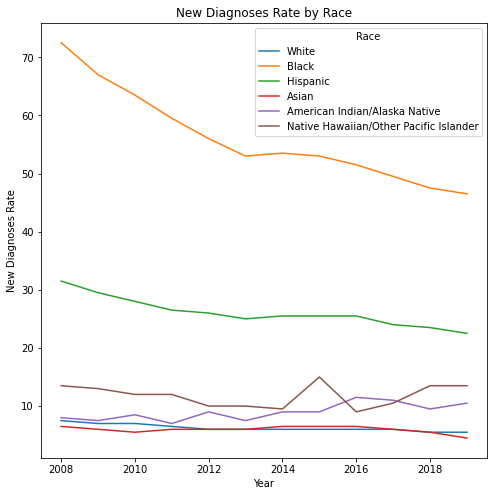

In [ ]:
plt.figure(figsize = (8, 8))
sns.lineplot(x = "Year", y = "New Diagnoses Rate", hue = "Race", ci = None, data = rates).set(title = 'New Diagnoses Rate by Race')

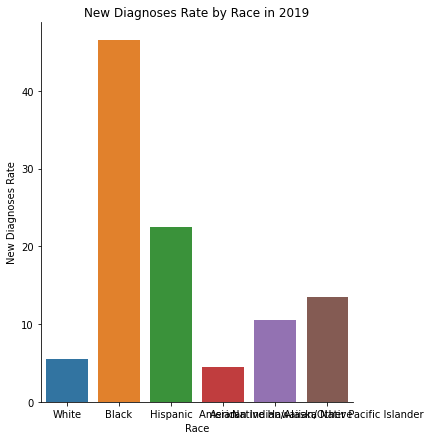

In [ ]:
sns.catplot(data = rates[rates["Year"] == 2019], kind = "bar", x = "Race", y = "New Diagnoses Rate", 
            ci = None, height = 6).set(title = 'New Diagnoses Rate by Race in 2019')

# HIV New Cases Dynamics by Race and Gender

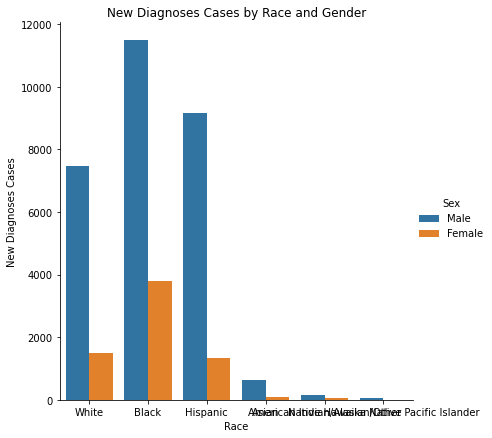

In [ ]:
sns.catplot(data = rates[rates["Year"] == 2019], kind = "bar", x = "Race", y = "New Diagnoses Cases", hue = "Sex", 
            ci = None, height = 6).set(title = 'New Diagnoses Cases by Race and Gender')

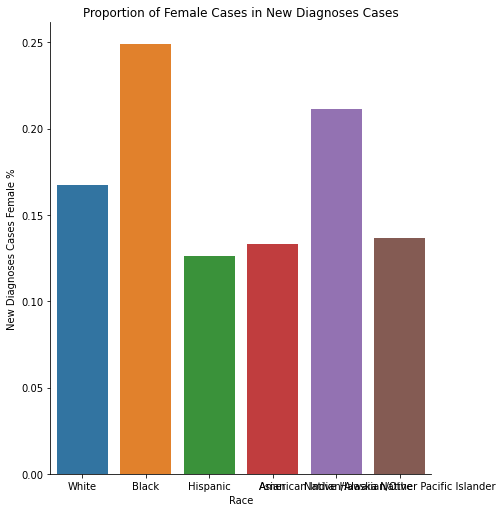

In [ ]:
rates_females = rates[rates["Sex"] == "Female"]
rates_total = rates.groupby(["Year", "Race"]).sum().reset_index()
rates_aux = rates_females.merge(rates_total, on = ["Year", "Race"], how = "left")
rates_aux["New Diagnoses Cases Female %"] = rates_aux["New Diagnoses Cases_x"] / rates_aux["New Diagnoses Cases_y"]
sns.catplot(data = rates_aux[rates_aux["Year"] == 2019], kind = "bar", x = "Race", y = "New Diagnoses Cases Female %", ci = None, 
            height = 7).set(title = 'Proportion of Female Cases in New Diagnoses Cases')